***Анализ данных и визуализация: проект Ozempic***



In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

**Краткий обзор набора данных features_data.csv**

Наш набор данных features_data.csv содержит информацию о различных кодах ATC и связанных с ними атрибутах.

**Ключевые атрибуты включают:**

* ATC, ATC_info, ATC_hierarchy: Идентификаторы и классификации.
* used_in_diabetes: Булевый флаг для актуальности при диабете.
* Mechanism of Action, Targets, Indication: Подробные текстовые описания.
* Количественные признаки:
  * number_of_children, num_targets, mechanism_complexity.
  * Средние метрики сходства и совпадения: avg_mechanism_similarity, avg_target_overlap.

* Булевые флаги для пропущенных данных: Например, missing_mechanism, missing_targets.





In [61]:
# Загрузка файлов
drug_data = pd.read_csv("drug_data_results.csv")
features_data = pd.read_csv("features_data.csv")

# Очистка ATC-кодов в drug_data
def clean_atc_code(atc_code):
    codes = atc_code.split(",")  # Разделение по запятой, если несколько кодов
    first_code = codes[0].strip()  # Берем первый код и удаляем лишние пробелы
    cleaned_code = re.sub(r"\s*\(.*?\)", "", first_code)  # Удаление скобок и их содержимого
    return cleaned_code

drug_data["ATC_Cleaned"] = drug_data["ATC Code"].astype(str).apply(clean_atc_code)

# Приведение к единому регистру и удаление пробелов
drug_data["ATC_Cleaned"] = drug_data["ATC_Cleaned"].str.strip().str.upper()
features_data["ATC"] = features_data["ATC"].str.strip().str.upper()

# Создание словаря соответствий
atc_mapping = {atc: [ref_atc for ref_atc in features_data["ATC"].unique() if atc in ref_atc] for atc in drug_data["ATC_Cleaned"].unique()}

# Создание датафрейма соответствий
atc_expanded_mapping = [(short_atc, full_atc) for short_atc, full_atcs in atc_mapping.items() for full_atc in full_atcs]
atc_mapping_df = pd.DataFrame(atc_expanded_mapping, columns=["ATC_Cleaned", "ATC"])

# Объединение данных
merged_data_partial = pd.merge(drug_data, atc_mapping_df, on="ATC_Cleaned", how="inner")
data = pd.merge(merged_data_partial, features_data, on="ATC", how="inner")

# Сохранение результата
data.to_csv("merged_data.csv", index=False)

# Вывод первых строк результата
print(data.head())


                Drug Name    RxCUI                              ATC Code  \
0  Calcium glucoheptonate    47618                       A12AA (Calcium)   
1              Teplizumab  2621880  A10XX (Other drugs used in diabetes)   
2               Tolrestat    38386   A10XA (Aldose reductase inhibitors)   
3            Pioglitazone   259319            A10BG (Thiazolidinediones)   
4            Pioglitazone   259319            A10BG (Thiazolidinediones)   

          Ingredients           Clinical Dose Groups    Dose Form Groups  \
0  calcium gluceptate                            NaN                 NaN   
1          teplizumab  teplizumab Injectable Product  Injectable Product   
2           tolrestat                            NaN                 NaN   
3        pioglitazone                            NaN                 NaN   
4        pioglitazone                            NaN                 NaN   

         Branded Dose Groups ATC_Cleaned      ATC                ATC_info  \
0        

In [62]:
data

,Drug Name,RxCUI,ATC Code,Ingredients,Clinical Dose Groups,Dose Form Groups,Branded Dose Groups,ATC_Cleaned,ATC,ATC_info,...,Indication,mechanism_keywords,num_targets,mechanism_complexity,indication_category,missing_mechanism,missing_targets,missing_indication,avg_mechanism_similarity,avg_target_overlap
0,Calcium glucoheptonate,47618,A12AA (Calcium),calcium gluceptate,NaN,NaN,NaN,A12AA,A12AA10,Calcium glucoheptonate,...,For treatment of mild hypocalcemia due to neon...,"['in', 'normal', 'returning', 'deminished', 'r...",1,16,other,False,True,False,0.033811,NaN
1,Teplizumab,2621880,A10XX (Other drugs used in diabetes),teplizumab,teplizumab Injectable Product,Injectable Product,Tzield Injectable Product,A10XX,A10XX01,Teplizumab,...,Teplizumab is indicated to delay the onset of ...,"['it', 'Stage', 'from', 'loss', 'relevant', 'h...",2,122,other,False,False,False,0.069465,0.000000
2,Tolrestat,38386,A10XA (Aldose reductase inhibitors),tolrestat,NaN,NaN,NaN,A10XA,A10XA01,Tolrestat,...,For the pharmacological control of certain dia...,"['Available', 'Not']",5,2,other,True,True,False,NaN,0.000000
3,Pioglitazone,259319,A10BG (Thiazolidinediones),pioglitazone,NaN,NaN,NaN,A10BG,A10BG01,Troglitazone,...,For the treatment of Type II diabetes mellitus...,"['its', 'it', 'glucose', 'vitamin', 'improving...",10,143,other,False,True,False,0.083680,0.015038
4,Pioglitazone,259319,A10BG (Thiazolidinediones),pioglitazone,NaN,NaN,NaN,A10BG,A10BG02,Rosiglitazone,...,Rosiglitazone is indicated as an adjunct to di...,"['in', 'regulates', 'peroxisome', 'glucose', '...",8,58,other,False,True,False,0.073012,0.022556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,Nortriptyline,203130,N06AA (Non-selective monoamine reuptake inhibi...,nortriptyline,NaN,NaN,NaN,N06AA,N06AA10,Nortriptyline,...,Nortriptyline is indicated for the relief of t...,"['adrenergic', 'in', '11', 'nortriptyline18', ...",16,91,chronic,False,False,False,0.054774,0.015038
249,Ketazolam,28181,N05BA (Benzodiazepine derivatives),ketazolam,NaN,NaN,NaN,N05BA,N05BA10,Ketazolam,...,Ketazolam could be used for the treatment of a...,"['well', 'raises', 'of', 'This', 'and', 'this'...",3,127,other,False,False,False,0.067434,0.000000
250,Benorilate,1372,N02BA (Salicylic acid and derivatives),benorilate,"benorilate Oral Liquid Product, benorilate Ora...","Oral Product, Pill, Oral Liquid Product",NaN,N02BA,N02BA10,Benorilate,...,Not Available,"['Available', 'Not']",1,2,other,True,True,True,NaN,NaN
251,Papaveretum,253192,N02AA (Natural opium alkaloids),papaveretum,NaN,NaN,NaN,N02AA,N02AA10,Papaveretum,...,No indication found,"['found', 'mechanism', 'No']",1,3,other,True,True,True,NaN,NaN


In [63]:
# Первоначальная проверка.

print("Data Information:")
data.info()

print("\nFirst Five Rows:")
print(data.head())

print("\nSummary Statistics:")
print(data.describe())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Drug Name                 253 non-null    object 
 1   RxCUI                     253 non-null    int64  
 2   ATC Code                  253 non-null    object 
 3   Ingredients               253 non-null    object 
 4   Clinical Dose Groups      202 non-null    object 
 5   Dose Form Groups          202 non-null    object 
 6   Branded Dose Groups       93 non-null     object 
 7   ATC_Cleaned               253 non-null    object 
 8   ATC                       253 non-null    object 
 9   ATC_info                  253 non-null    object 
 10  ATC_hierarchy             253 non-null    object 
 11  used_in_diabetes          253 non-null    bool   
 12  is_terminal_category      253 non-null    int64  
 13  number_of_children        253 non-null    int64

In [64]:
# Проверка наличия пропущенных значений.

missing_values = data.isnull().sum()

print("\nMissing Values:")
print(missing_values)


Missing Values:
Drug Name                     0
RxCUI                         0
ATC Code                      0
Ingredients                   0
Clinical Dose Groups         51
Dose Form Groups             51
Branded Dose Groups         160
ATC_Cleaned                   0
ATC                           0
ATC_info                      0
ATC_hierarchy                 0
used_in_diabetes              0
is_terminal_category          0
number_of_children            0
Mechanism of Action           0
Targets                       0
Indication                    0
mechanism_keywords            0
num_targets                   0
mechanism_complexity          0
indication_category           0
missing_mechanism             0
missing_targets               0
missing_indication            0
avg_mechanism_similarity     60
avg_target_overlap           59
dtype: int64


In [65]:
# Обработка пропущенных значений с помощью медианной импутации гарантирует, что заполненные значения не будут чрезмерно влиять на общее распределение данных.
# Медиана обрабатывает пропущенные данные без введения смещения, поскольку она представляет собой середину набора данных.

data["avg_mechanism_similarity"].fillna(data["avg_mechanism_similarity"].median(), inplace=True)
data["avg_target_overlap"].fillna(data["avg_target_overlap"].median(), inplace=True)

<ipython-input-65-76e9c5f6b48b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["avg_mechanism_similarity"].fillna(data["avg_mechanism_similarity"].median(), inplace=True)
<ipython-input-65-76e9c5f6b48b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

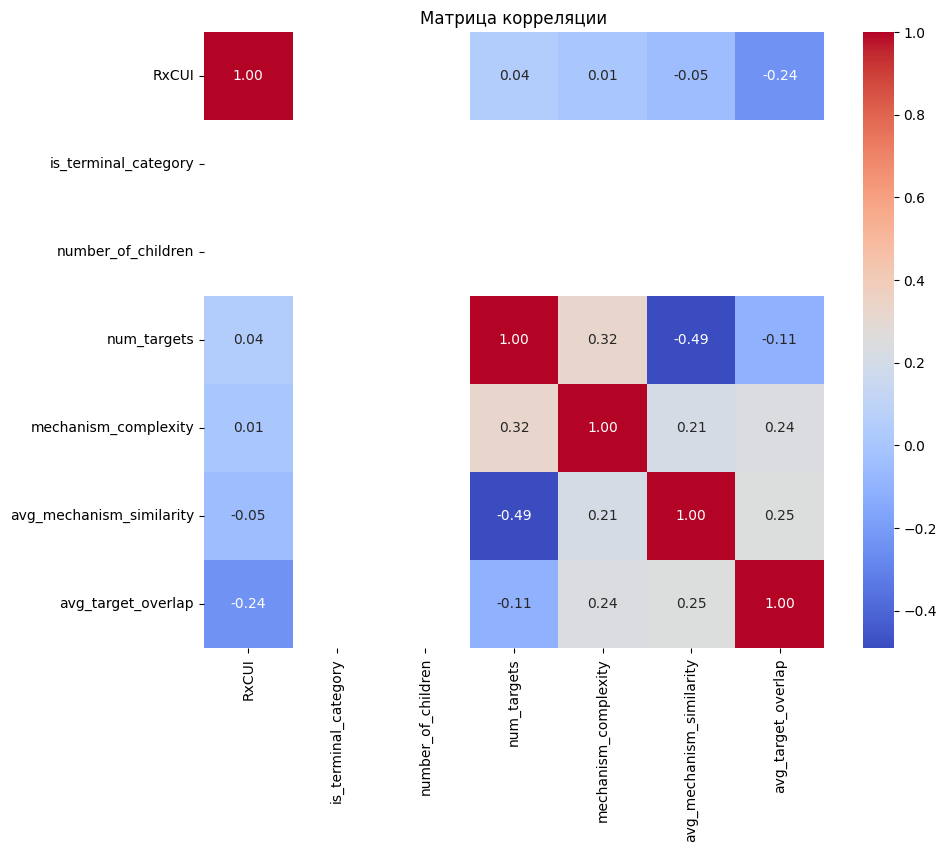

In [66]:
# Матрица корреляции (только числовые столбцы).

numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Матрица корреляции")
plt.show()

**Наблюдения за матрицей корреляции:**

**Сильная положительная корреляция**

* Отсутствует, так как ни одна пара переменных не имеет коэффициента выше 0.5.

**Умеренная положительная корреляция**
* avg_mechanism_similarity и avg_target_overlap (0.25):
Препараты с похожими механизмами действия умеренно нацелены на одни и те же биологические мишени. Это подтверждает тенденцию, согласно которой лекарства с аналогичными принципами работы могут воздействовать на схожие белковые структуры.

* mechanism_complexity и num_targets (0.32):
Препараты с большим количеством мишеней в целом имеют более сложные механизмы действия.

* mechanism_complexity и avg_mechanism_similarity (0.21):
Более сложные механизмы чаще оказываются схожими с другими, что может свидетельствовать о повторном использовании определенных терапевтических стратегий.

* mechanism_complexity и avg_target_overlap (0.24):
Препараты с более сложными механизмами действия умеренно связаны с более высоким перекрытием биологических мишеней.

**Слабая положительная корреляция**
* num_targets и avg_target_overlap (-0.11):
Лекарства, нацеленные на большее количество мишеней, в среднем демонстрируют незначительное снижение совпадения этих мишеней с другими препаратами.

**Сильная отрицательная корреляция**
* num_targets и avg_mechanism_similarity (-0.49):
Препараты с большим количеством мишеней чаще имеют уникальные механизмы действия, не совпадающие с механизмами других лекарств.

**Почти нет / Нет корреляции**
* Переменная is_terminal_category имеет почти нулевую корреляцию со всеми остальными переменными, что указывает на отсутствие линейной связи с этими признаками.
* num_targets и avg_mechanism_similarity (0,02): Количество биологических мишеней, с которыми взаимодействует лекарство, практически не связано с тем, насколько схожи его механизмы с другими лекарствами.

In [70]:
# Группировка: Средняя сходность механизмов действия по категориям показаний.

avg_mechanism_by_category = data.groupby("indication_category")["avg_mechanism_similarity"].mean()

print("\nAverage Mechanism Similarity by Indication Category:")
print(avg_mechanism_by_category)


Average Mechanism Similarity by Indication Category:
indication_category
chronic    0.055970
obesity    0.064150
other      0.076138
Name: avg_mechanism_similarity, dtype: float64


In [71]:
# Фильтрация: Записи с выше-средней сложностью механизмов действия.

above_avg_complexity = data[data["mechanism_complexity"] > data["mechanism_complexity"].mean()]

print("\nFirst Five Rows of Above-Average Mechanism Complexity:")
print(above_avg_complexity.head())


First Five Rows of Above-Average Mechanism Complexity:
       Drug Name    RxCUI                              ATC Code  \
1     Teplizumab  2621880  A10XX (Other drugs used in diabetes)   
3   Pioglitazone   259319            A10BG (Thiazolidinediones)   
5   Pioglitazone   259319            A10BG (Thiazolidinediones)   
7  Rosiglitazone   253198            A10BG (Thiazolidinediones)   
9  Rosiglitazone   253198            A10BG (Thiazolidinediones)   

     Ingredients           Clinical Dose Groups    Dose Form Groups  \
1     teplizumab  teplizumab Injectable Product  Injectable Product   
3   pioglitazone                            NaN                 NaN   
5   pioglitazone                            NaN                 NaN   
7  rosiglitazone                            NaN                 NaN   
9  rosiglitazone                            NaN                 NaN   

         Branded Dose Groups ATC_Cleaned      ATC      ATC_info  ...  \
1  Tzield Injectable Product       A10XX  

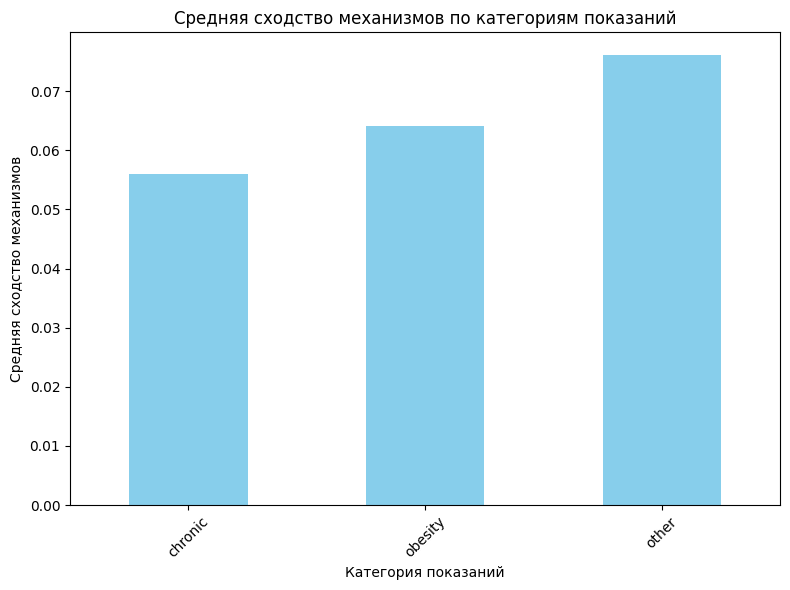

In [72]:
# Визуализация 1: Гистограмма средней сходности механизмов действия по категориям показаний.

plt.figure(figsize=(8, 6))

avg_mechanism_by_category.plot(kind="bar", color="skyblue")

plt.title("Средняя сходство механизмов по категориям показаний")
plt.xlabel("Категория показаний")
plt.ylabel("Средняя сходство механизмов")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Средняя сходность механизмов действия по категориям показаний**

* Ось X: Различные категории показаний (острые, хронические, ожирение, другие).
* Ось Y: Значение средней сходности механизмов.

**Наблюдения:**
*Категория "other" (другие) имеет наибольшую среднюю схожесть механизмов, примерно 0.075.
*Категория "obesity" (ожирение) занимает второе место, но с небольшим отставанием.
*Категория "chronic" (хронические заболевания) показывает наименьшую среднюю схожесть механизмов, что говорит о большем разнообразии механизмов действия в этой группе.

**Вывод:**
* Категория "other" демонстрирует более схожие механизмы действия, что может указывать на стандартизированные терапевтические подходы.
* Категория "chronic" имеет наиболее разнообразные механизмы, что объясняется сложностью лечения хронических заболеваний.
Категория "obesity" находится между этими двумя группами, демонстрируя умеренную схожесть механизмов.

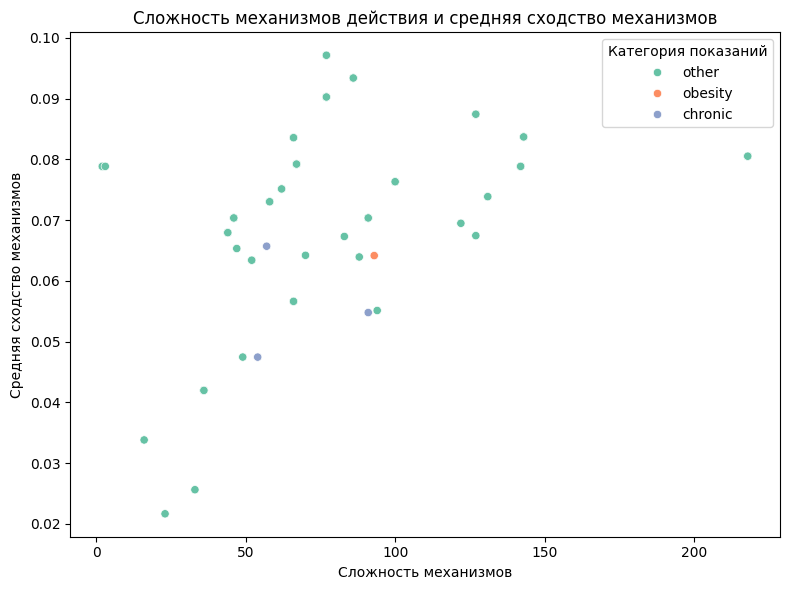

In [53]:
# Визуализация 2: Разбросанная диаграмма сложности механизмов действия и средней сходности механизмов.

plt.figure(figsize=(8, 6))

sns.scatterplot(data=data, x="mechanism_complexity", y="avg_mechanism_similarity", hue="indication_category", palette="Set2")

plt.title("Сложность механизмов действия и средняя сходство механизмов")
plt.xlabel("Сложность механизмов")
plt.ylabel("Средняя сходство механизмов")
plt.legend(title="Категория показаний")
plt.tight_layout()
plt.show()

**Сложность механизмов действия и средняя сходность механизмов**

* Ось X: Сложность механизма (насколько сложным или детализированным является механизм действия).
* Ось Y: Средняя сходность механизмов.

**Наблюдения:**
* Наблюдается слабая положительная тенденция между сложностью механизма и средней схожестью механизмов. Однако связь не является линейной, и есть значительный разброс значений.
* В диапазоне низкой сложности (0-100) механизмы демонстрируют разнообразные значения схожести, что указывает на наличие как узкоспециализированных, так и универсальных механизмов в этой группе.
* При увеличении сложности механизма выше 100, средняя схожесть механизмов остается разбросанной, но встречаются выбросы с высокими значениями.
* Категории показаний "chronic" и "obesity" сосредоточены в диапазоне более низкой сложности, в то время как "other" охватывает более широкий диапазон сложностей.


**Вывод:**
* Сложные механизмы не всегда имеют более высокую среднюю схожесть, что может указывать на их уникальные особенности или редкость в использовании.
* Категория "other" включает механизмы с разной степенью сложности, что подтверждает ее разноплановую природу.
* Хронические заболевания и ожирение чаще связаны с механизмами умеренной сложности, что может говорить о стандартизированных подходах к лечению.

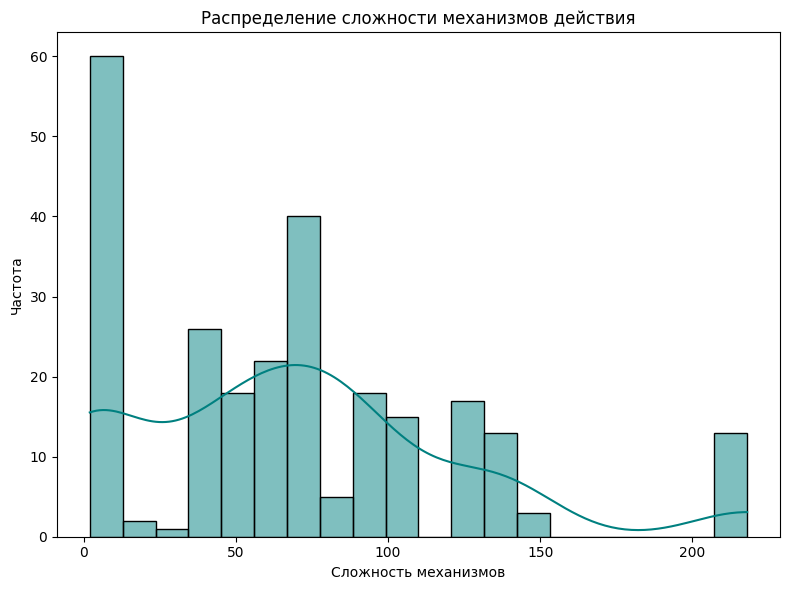

In [55]:
# Визуализация 3: Гистограмма сложности механизмов действия.

plt.figure(figsize=(8, 6))

sns.histplot(data["mechanism_complexity"], bins=20, kde=True, color="teal")

plt.title("Распределение сложности механизмов действия")
plt.xlabel("Сложность механизмов")
plt.ylabel("Частота")
plt.tight_layout()
plt.show()

**Некоторые наблюдения и выводы:**

Наблюдения на основе гистограммы:
* Асимметричное распределение: Гистограмма показывает, что распределение сложности механизмов действия асимметрично вправо. Это означает, что большинство механизмов имеют низкую сложность, а более сложные механизмы встречаются реже.

* Пик на низкой сложности: На гистограмме наблюдается явный пик на самом низком уровне сложности. Это указывает на то, что большинство записей в наборе данных относятся к простым механизмам.
* Длинный хвост в сторону высокой сложности: Хвост распределения тянется в сторону более высоких значений сложности, но частота таких случаев значительно ниже. Это говорит о том, что сложные механизмы существуют, но они менее распространены.

**Вывод:**
* Преобладание простых механизмов: Большинство механизмов в наборе данных являются простыми, что может указывать на их более широкую распространенность или легкость в идентификации.
* Редкость сложных механизмов: Сложные механизмы, хотя и присутствуют, встречаются значительно реже. Это может быть связано с тем, что такие механизмы труднее разработать, идентифицировать или они менее востребованы.

<Figure size 1000x600 with 0 Axes>

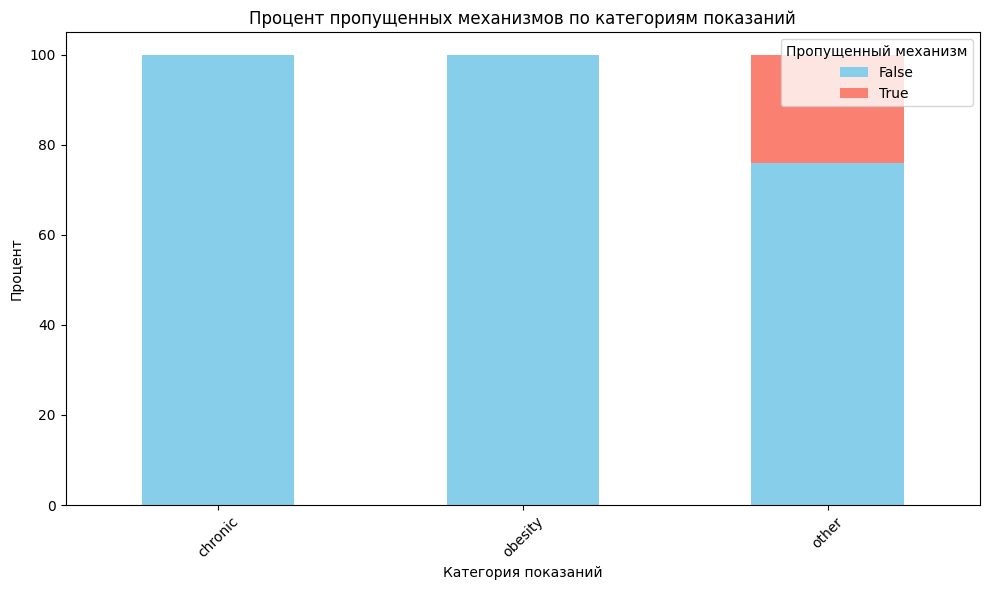

In [56]:
# Кросс-таблица: Частота категорий показаний с пропущенными механизмами.
indication_missing_mech = pd.crosstab(data["indication_category"], data["missing_mechanism"])
indication_missing_mech_percentage = indication_missing_mech.div(indication_missing_mech.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))

indication_missing_mech_percentage.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], figsize=(10, 6))

plt.title("Процент пропущенных механизмов по категориям показаний")
plt.xlabel("Категория показаний")
plt.ylabel("Процент")
plt.legend(title="Пропущенный механизм")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Пропущенные механизмы по категориям показаний:**
* Выделяет области, где существуют проблемы качества данных, такие как отсутствие информации о механизмах для категории "Другие".

**Вывод:**
* Категории "Острые", "Хронические" и "Ожирение" не имеют пропущенных механизмов.
* Категория "Другие" имеет около 22,5% пропущенных механизмов, что указывает на потенциальные несоответствия или неполноту данных.

<ipython-input-57-c9381d5c49cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="used_in_diabetes", y="mechanism_complexity", palette="Set3")


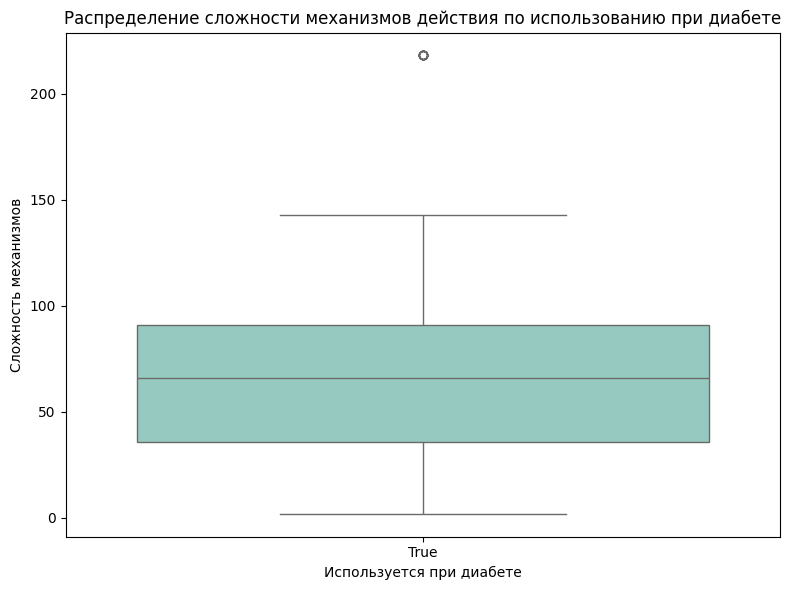

In [57]:
# Боксплот сложности механизмов действия по использованию при диабете.
plt.figure(figsize=(8, 6))

sns.boxplot(data=data, x="used_in_diabetes", y="mechanism_complexity", palette="Set3")

plt.title("Распределение сложности механизмов действия по использованию при диабете")
plt.xlabel("Используется при диабете")
plt.ylabel("Сложность механизмов")
plt.tight_layout()
plt.show()


**Сложность механизмов действия по использованию при лечении диабета:**
* Помогает понять, коррелирует ли сложность с использованием при лечении диабета.

**Вывод:**
* Препараты, используемые при диабете, чаще всего имеют умеренную сложность механизма, что может свидетельствовать о стандартизированных стратегиях лечения.
* Некоторые препараты обладают высокой сложностью механизма (выше 140), но это редкость.
* Разброс значений указывает на разнообразие подходов к лечению диабета, включая как простые, так и сложные многокомпонентные механизмы.

<ipython-input-58-6b09704d54bf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="indication_category", y="mechanism_keywords_length", palette="coolwarm")


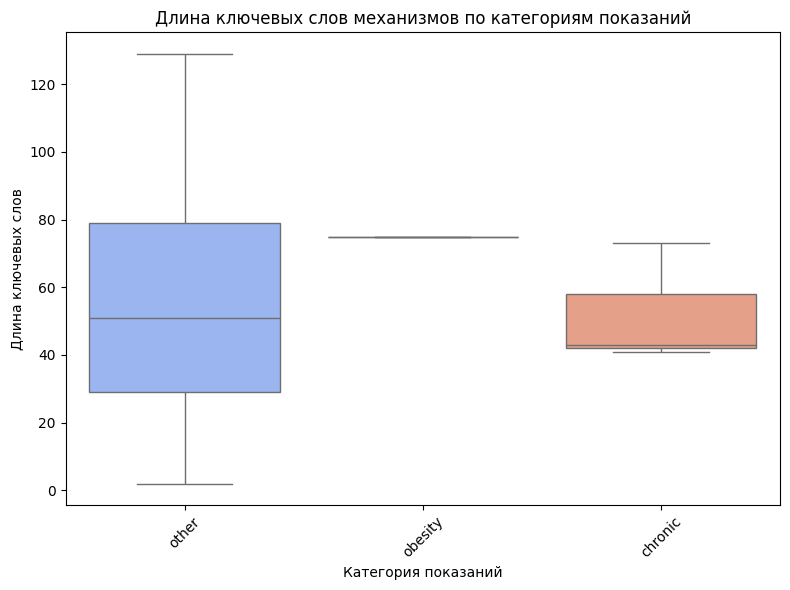

In [58]:
# Рассчитать длину ключевых слов механизмов.
data["mechanism_keywords_length"] = data["mechanism_keywords"].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)

# Боксплот длины ключевых слов по категориям показаний.
plt.figure(figsize=(8, 6))

sns.boxplot(data=data, x="indication_category", y="mechanism_keywords_length", palette="coolwarm")

plt.title("Длина ключевых слов механизмов по категориям показаний")
plt.xlabel("Категория показаний")
plt.ylabel("Длина ключевых слов")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Длина ключевых слов механизмов по категориям показаний:**
* Показывает, как богатство описательных ключевых слов варьируется по категориям, потенциально отражая сложность механизмов.

**Наблюдения и вывод:**
* Препараты из категории "other" характеризуются высокой вариативностью описания механизмов, что может указывать на большую неоднородность механизмов действия.
* Категория "chronic" демонстрирует более предсказуемую длину ключевых слов, что может говорить о стандартизации описаний механизмов.
* Категория "obesity" содержит мало данных, но её распределение схоже с "chronic", что подтверждает наличие устоявшихся механизмов.

